In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd

# **Task 1** Fully connected neural network

Data preparation

In [6]:
weather_df = pd.read_csv("/weatherAUS.csv")
weather_df.dropna(subset=['RainTomorrow'], inplace=True)
weather_df.fillna(weather_df.mean(), inplace = True)
weather_df['RainTomorrow'] = weather_df.RainTomorrow.astype("category").cat.codes

features_df = weather_df[['Rainfall', 'Sunshine' ,'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'Cloud3pm']]
labels_df = weather_df.RainTomorrow
labels_df = tf.keras.utils.to_categorical(labels_df, 2)
X_train, X_test, Y_train, Y_test = train_test_split(features_df, labels_df, test_size=0.2)

Model creation

In [7]:
model =  keras.Sequential()
model.add(layers.Dense(144, activation='relu', input_shape=(6,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(144, activation='relu'))
model.add(layers.Dense(144, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy',   optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 144)               1008      
                                                                 
 dense_9 (Dense)             (None, 256)               37120     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 144)               37008     
                                                                 
 dense_11 (Dense)            (None, 144)               20880     
                                                                 
 dropout_3 (Dropout)         (None, 144)               0         
                                                                 
 dense_12 (Dense)            (None, 256)              

In [8]:
history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2,
                    verbose = 2)

Epoch 1/10
2844/2844 - 14s - loss: 0.4311 - accuracy: 0.8056 - val_loss: 0.5591 - val_accuracy: 0.6668 - 14s/epoch - 5ms/step
Epoch 2/10
2844/2844 - 12s - loss: 0.4028 - accuracy: 0.8295 - val_loss: 0.4266 - val_accuracy: 0.8020 - 12s/epoch - 4ms/step
Epoch 3/10
2844/2844 - 14s - loss: 0.3971 - accuracy: 0.8314 - val_loss: 0.5012 - val_accuracy: 0.7566 - 14s/epoch - 5ms/step
Epoch 4/10
2844/2844 - 11s - loss: 0.3929 - accuracy: 0.8319 - val_loss: 0.4017 - val_accuracy: 0.8304 - 11s/epoch - 4ms/step
Epoch 5/10
2844/2844 - 11s - loss: 0.3913 - accuracy: 0.8336 - val_loss: 0.4568 - val_accuracy: 0.7886 - 11s/epoch - 4ms/step
Epoch 6/10
2844/2844 - 12s - loss: 0.3899 - accuracy: 0.8332 - val_loss: 0.4482 - val_accuracy: 0.7921 - 12s/epoch - 4ms/step
Epoch 7/10
2844/2844 - 11s - loss: 0.3891 - accuracy: 0.8346 - val_loss: 0.5607 - val_accuracy: 0.7160 - 11s/epoch - 4ms/step
Epoch 8/10
2844/2844 - 11s - loss: 0.3869 - accuracy: 0.8347 - val_loss: 0.3974 - val_accuracy: 0.8294 - 11s/epoch - 4

history_keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


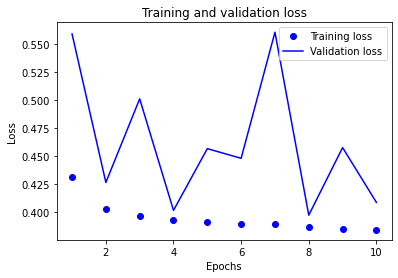

In [9]:
history_dict = history.history
print(f'history_keys: {history_dict.keys()}')

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Model evaluation

In [11]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

889/889 [==============================] - 1s 1ms/step - loss: 0.4054 - accuracy: 0.8361
Test loss: 0.40537285804748535
Test accuracy: 0.8361053466796875


# **Task 2** CNN

1.1 *CHESS*
<br> Data preparation
<br>link to the data source https://www.kaggle.com/niteshfre/chessman-image-dataset

In [2]:
import os
import zipfile
from PIL import Image

def create_img_dataset(prefix_dir, classes):
  image_list = []
  label_list = []
  for class_num, class_dir in enumerate(classes):
    for i, item in enumerate(os.listdir(prefix_dir + class_dir)):
      if item == '.ipynb_checkpoints':
        continue
      image = Image.open(prefix_dir + class_dir + '/' + item)\
                  .resize((height, width))
      img_tenzor = np.array(image)/255
      img_tenzor = img_tenzor.astype('float32')
      image_list.append(img_tenzor)
      label_list.append(class_num)
      if i == 15:
        plt.figure(class_num)
        plt.clf()
        plt.axis("off")
        plt.title(f"class {class_dir}")
        plt.imshow(img_tenzor)

  label_list = tf.keras.utils.to_categorical(label_list, len(classes))
  image_list = np.array(image_list, dtype='float32')
  return image_list, label_list

Bishop items: 87
Rook items: 102
King items: 76
Queen items: 78
Knight items: 106
Pawn items: 107

 total items count in dataset: 315


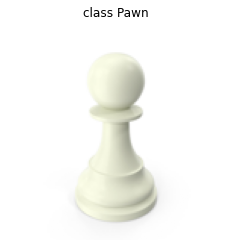

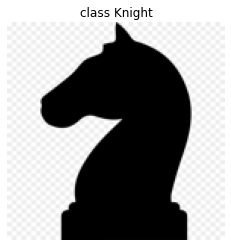

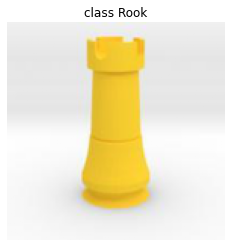

In [3]:
width = 144
height = 144
total_shape = (width, height, 3)
input_dim = width * height

with zipfile.ZipFile('/chess.zip', 'r') as zip_ref:
  zip_ref.extractall('/chess/')

data_dir = '/chess/Chessman-image-dataset/Chess/'

#check amount of items in each class
for class_dir in os.listdir(data_dir):
  print(f'{class_dir} items: {len(os.listdir(data_dir+class_dir))}')

classes = ['Pawn', 'Knight', 'Rook']

image_list, label_list = create_img_dataset(data_dir, classes)
print(f'\n total items count in dataset: {len(image_list)}')

In [4]:
batch_size = 64
epochs = 7
num_classes = len(classes)

X_train, X_test, Y_train, Y_test = train_test_split(image_list, label_list, shuffle=True, test_size=0.25)


Model creation

In [5]:
model = keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), padding="same", activation='relu', input_shape=(height, width, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 142, 142, 64)      18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 140, 140, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 138, 138, 256)     295168    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 256)       0         
                                                        

In [7]:
model.fit(x = X_train,
          y = Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

#keras.callbacks.EarlyStopping

Epoch 1/7
4/4 [==============================] - 169s 42s/step - loss: 14.7517 - accuracy: 0.3263 - val_loss: 1.1120 - val_accuracy: 0.4430
Epoch 2/7
4/4 [==============================] - 165s 41s/step - loss: 1.1168 - accuracy: 0.3814 - val_loss: 1.0987 - val_accuracy: 0.3038
Epoch 3/7
4/4 [==============================] - 163s 41s/step - loss: 1.0952 - accuracy: 0.4110 - val_loss: 1.1079 - val_accuracy: 0.3038
Epoch 4/7
4/4 [==============================] - 171s 43s/step - loss: 1.0414 - accuracy: 0.4322 - val_loss: 1.0705 - val_accuracy: 0.4684
Epoch 5/7
4/4 [==============================] - 164s 41s/step - loss: 1.0010 - accuracy: 0.5678 - val_loss: 1.0953 - val_accuracy: 0.3671
Epoch 6/7
4/4 [==============================] - 164s 41s/step - loss: 0.8683 - accuracy: 0.6314 - val_loss: 1.1684 - val_accuracy: 0.4177
Epoch 7/7
4/4 [==============================] - 167s 42s/step - loss: 1.0622 - accuracy: 0.6314 - val_loss: 1.5737 - val_accuracy: 0.3797


Model inference

In [8]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5736743211746216
Test accuracy: 0.37974682450294495


2.2 CATS & DOGS
<br> Data preparation
<br> link to the data source https://www.kaggle.com/waifuai/cat2dog

Cat train items: 771
Dog train items: 1264
.ipynb_checkpoints train items: 0
Cat test items: 100
Dog test items: 101
.ipynb_checkpoints test items: 0


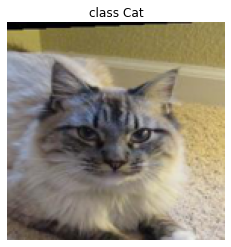

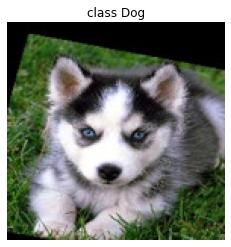

In [ ]:
width = 144
height = 144
total_shape = (width, height, 3)
input_dim = width * height

with zipfile.ZipFile('/content/data1.zip', 'r') as zip:
  zip.extractall('/catsdogs/')

train_data_dir = '/catsdogs/cat2dog/cat2dog/train/'
test_data_dir = '/catsdogs/cat2dog/cat2dog/test/'
classes = ['Cat', 'Dog']

for class_dir in os.listdir(train_data_dir):
  print(f'{class_dir} train items: {len(os.listdir(train_data_dir+class_dir))}')
for class_dir in os.listdir(test_data_dir):
  print(f'{class_dir} test items: {len(os.listdir(test_data_dir+class_dir))}')

train_image_list, train_label_list = create_img_dataset(train_data_dir, classes)
train_image_list, train_label_list = train_image_list[:700], train_label_list[:700]
test_image_list, test_label_list = create_img_dataset(test_data_dir, classes)
test_image_list, test_label_list = test_image_list[:90], test_label_list[:90]

Model creation

In [9]:
batch_size = 64
epochs = 5
num_classes = len(classes)

model =  keras.Sequential()
model.add(layers.Conv2D(32, kernel_size=(5, 5), padding="same", activation='relu', input_shape=(height, width, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 144, 144, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 142, 142, 64)      18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 140, 140, 128)     73856     
                                                                 
 conv2d_7 (Conv2D)           (None, 138, 138, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 256)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 46, 46, 256)       0         
                                                      

In [ ]:
model.fit(x = train_image_list,
          y = train_label_list,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)

Epoch 1/5
9/9 [==============================] - 410s 45s/step - loss: 1.5981e-06 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
9/9 [==============================] - 421s 47s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
9/9 [==============================] - 423s 47s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
9/9 [==============================] - 419s 46s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
9/9 [==============================] - 423s 48s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


Model inference

In [ ]:
score = model.evaluate(test_image_list, test_label_list, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0
Test accuracy: 1.0


# **Task 3** RNN, Time series forecasting

Data preparation
<br> link to the data source https://www.kaggle.com/salmanfaroz/amazon-stock-price-1997-to-2020

In [ ]:
amazon_df = pd.read_csv("/Amazon.csv")
amazon_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [ ]:
 amazon_df['date'] = amazon_df['Date']
amazon_df['value'] = (amazon_df['High'] + amazon_df['Low'])/2
amazon_df = amazon_df.sort_values(by=['date'])
amazon_df = amazon_df[['value']]
amazon_df

,value
0,2.213542
1,1.843750
2,1.697917
3,1.692708
4,1.510417
...,...
5837,3056.885010
5838,3036.425049
5839,3017.964966
5840,3048.500000


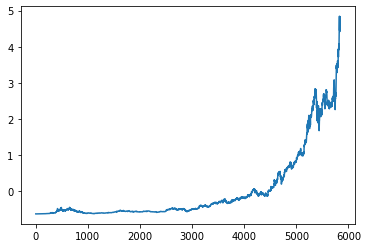

In [ ]:
mean = np.mean(amazon_df['value'])
std = np.std(amazon_df['value'])
amazon_df['value'] = (amazon_df['value'] - mean)/std
plt.plot(amazon_df['value'])

In [ ]:
train_size = int(len(amazon_df) * 0.92)
test_size = len(amazon_df) - train_size
Train, Test = amazon_df[0:train_size].to_numpy(), amazon_df[train_size:len(amazon_df)].to_numpy()

In [ ]:
def create_dataset(dataset, time_steps=5):
    x, y = [], []
    for i in range(len(dataset)-time_steps-1):
        x.append(dataset[i:(i+time_steps)])
        y.append(dataset[i+time_steps])
    return np.array(x), np.array(y)

In [ ]:
steps = 5
n_inputs = 1

X_train, Y_train = create_dataset(Train, steps)
X_test, Y_test = create_dataset(Test, steps)

x_train = np.reshape(X_train, (X_train.shape[0], steps, n_inputs))
x_test = np.reshape(X_test, (X_test.shape[0], steps, n_inputs))

Model creation

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, input_shape=(steps, n_inputs), return_sequences=True))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 5, 100)            40800     
                                                                 
 lstm_26 (LSTM)              (None, 100)               80400     
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 4
batch_size = 32

model.fit(x_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=2)
Y_pred = model.predict(x_test)

Epoch 1/4
168/168 - 6s - loss: 0.0227 - 6s/epoch - 34ms/step
Epoch 2/4
168/168 - 2s - loss: 7.4599e-04 - 2s/epoch - 11ms/step
Epoch 3/4
168/168 - 2s - loss: 5.6198e-04 - 2s/epoch - 12ms/step
Epoch 4/4
168/168 - 2s - loss: 5.3441e-04 - 2s/epoch - 11ms/step


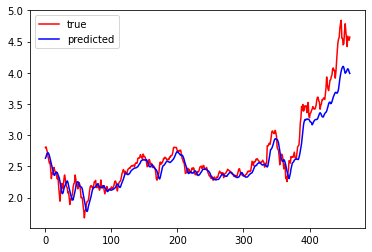

In [ ]:
plt.plot(Y_test, 'r', label = 'true')
plt.plot(Y_pred, 'b', label = 'predicted')
plt.legend()